**Created by Berkay Alan**

**Classification**

**17 January 2022**

**For more Tutorial:** https://www.kaggle.com/berkayalan

## Content


**Classification**

- Classification and Evaluation Metrics
- Logistic Regression (Theory - Model- Tuning)
- K - Nearest Neighbors(KNN) (Theory - Model- Tuning)
- Support Vector Machines(SVC) - Linear Kernel (Theory - Model- Tuning)
- Support Vector Machines(SVC) - Radial Basis Kernel (Theory - Model- Tuning)
- Decision Tree Classification (Theory - Model- Tuning)
- Ensemble Learning - Random Forests Classification (Theory - Model- Tuning)
- Naive Bayes Classification (Theory - Model)
- XGBoost(Extreme Gradient Boosting) Classification (Theory - Model- Tuning)

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Logistic Regression by Statquest**](https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer)

- [**The Ultimate Guide to Regression & Classification**](https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification)

- [**Logistic Regression for Machine Learning**](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

- [**Logistic Regression by Stanford University**](https://web.stanford.edu/class/stats202/notes/Classification/Logistic-regression.html)

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

- [**Support Vector Machines for Machine Learning**](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**Support Vector Machines by Statquest**](https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**SVM by Sklearn**](https://scikit-learn.org/stable/modules/svm.html)

- [**Kernel Functions-Introduction to SVM Kernel & Examples**](https://data-flair.training/blogs/svm-kernel-functions/)

- [**Naive Bayes for Machine Learning**](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)

- [**Gaussian Naive Bayes by Statquest**](https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer)

- [**Introduction To Naive Bayes Algorithm**](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-naive-bayes-algorithm/)

- [**Naive Bayes Classifier**](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c)

- [**Classification: Precision and Recall**](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

- [**Classification: ROC Curve and AUC**](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

- [**AUC-ROC Curve in Machine Learning Clearly Explained**](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

## Importing Libraries

In [104]:
from warnings import filterwarnings
filterwarnings("ignore")

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
import time
from xgboost import XGBClassifier
from skompiler import skompile
from lightgbm import LGBMClassifier
from joblib import dump, load

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [106]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Classification and Evaluation Metrics

### Classification

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data. 
The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with the problems where the data can be divided into binary or multiple discrete labels. 

Some use-cases:

- Mail classification (spam or not)

- Diagnosis of the sicknesses

- Customer buying prediction (if customer will buy or not)

### Evaluation Metrics

#### Confusion Matrix

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate our model.  Confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- **true positive**: These are cases in which we predicted positive, and they are actually positive.
- **false positive (Type 1 Error)**: We predicted postive, but they are actually negative. (Also known as a "Type 1 error.")
- **true negative**: We predicted negative, and they are actually negative.
- **false negative (Type 2 Error)**: We predicted negative, but they are actually postive. (Also known as a "Type 2 error.")

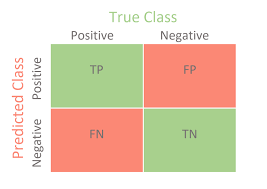

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

**Notation**: TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

#### Accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is **the fraction of predictions our model got right**.

Formally, accuracy has the following definition: All correct predictions / all predictions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follow: (TP+TN) / (TP+FP+FN+TN)

#### Recall

Recall gives us the answer of this question :

**What proportion of actual positives was identified correctly?**

It is defined as follows: TP / (TP+FN)

#### Precision

Precision gives us the answer of this question : 

**What proportion of positive identifications was actually correct?**

It is defined as follows: TP / (TP+FP)

#### F1 - Score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is: 2 * (precision * recall) / (precision + recall)

#### ROC Curve (Receiver Operating Characteristic Curve)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

An ROC curve plots TP rates vs. FP rares at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

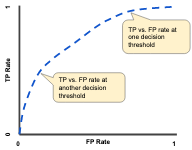

To compute the points in an ROC curve, we could evaluate a classification model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC (Area under Curve)

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

This is an example of AUC:

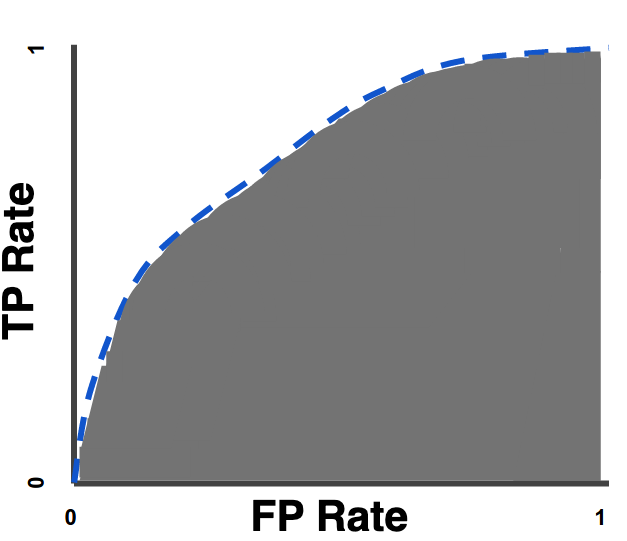

## Logistic Regression

### Theory

  Logistic Regression is so similar to linear Regression because both the models use linear equations for predictions. But the main difference is that Logistic regression is used to handle the classification problems wheras Linear Regression is used to handle regression problems. For example, we can try to predict the price of a house by using linear regression because we are predicting a price, a continuous number. But if we want to understand if an email is spam or not, we need to use Logistic Regression because we try to solve a binary classification problem (problem with two class values, *Spam* or *Not Spam* in this example).  

**Logistic(Sigmoid - σ) Function: The core of the method**

  The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.
  
  The formula of sigmoid function as below:
  
  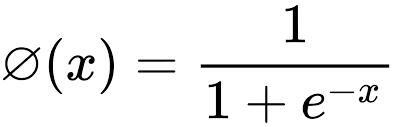
  
  Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.oreilly.com%2Flibrary%2Fview%2Fhands-on-automated-machine%2F9781788629898%2Faa703b68-f6df-40fd-b196-cdbef2b0c7db.xhtml&psig=AOvVaw3I4aV7wKnwIREXWNOOK5Ze&ust=1627894816803000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIjR1v66j_ICFQAAAAAdAAAAABAD)

Here e is base of the natural logarithms (Euler’s number) and value is the actual numerical value that we want to transform. 

  Input values (x) are combined linearly using weights or coefficient values to predict an output value y that equals to σ(x).

The function seems as below:

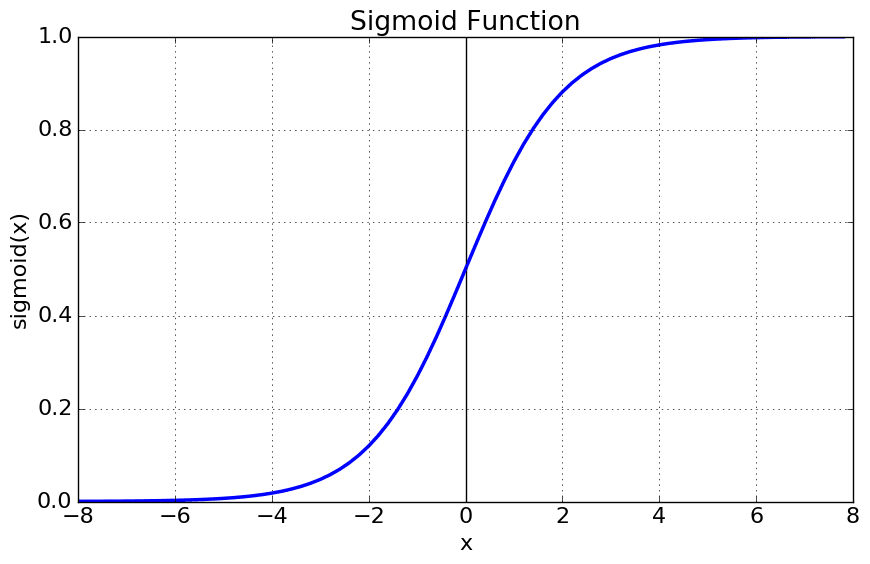

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdataaspirant.com%2F5-sigmoid-function%2F&psig=AOvVaw3I4aV7wKnwIREXWNOOK5Ze&ust=1627894816803000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIjR1v66j_ICFQAAAAAdAAAAABAV)

**Logistic Regression Predicts Probabilities**

Logistic regression models the probability of the default class (e.g. the first class).

For example, if we are modeling people’s gender as male or female from their weight, then the first class could be female and the logistic regression model could be written as the probability of female given a person’s weight, or more formally:

*P(gender=female|weight)*

We need to be aware of that the probability prediction must be transformed into a binary values (0 or 1) in order to actually make a probability prediction. 

Logistic regression is a linear method, but the predictions are transformed using the *logistic(sigmoid) function*. 



**Maximum-likelihood Estimation**

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from our training data. This can be done using maximum-likelihood estimation.

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of our data. 

The best coefficients would result in a model that would predict a value very close to 1 (e.g. female) for the default class and a value very close to 0 (e.g. male) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data.

### Model

For a real world example, we will work with **Pima Indians Diabetes Database** data set by UCI Machine Learning.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [188]:
df = pd.read_csv("diabetes.csv")

In [189]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [190]:
df.shape

(768, 9)

In [191]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [192]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [193]:
X.shape

(768, 8)

In [194]:
y.shape

(768,)

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [195]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [196]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,y_train)

In [197]:
logistic_regression

LogisticRegression(random_state=0, solver='liblinear')

In [198]:
#saving the model
dump(logistic_regression,"logistic_Regression_model.joblib")

['logistic_Regression_model.joblib']

In [199]:
logistic_regression.intercept_

array([-5.41676446])

In [200]:
logistic_regression.coef_

array([[ 1.12373935e-01,  2.48672617e-02, -1.52666301e-02,
        -2.44092749e-03, -2.19193243e-04,  6.44906672e-02,
         6.88362088e-01, -1.39730265e-04]])

**Most Important Parameters of Logistic Regression**

- Penalty: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied. default=’l2’

- C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- Class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- random_state: Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.

We will also create a model with **statsmodel** to get more information.

In [201]:
lr_statsmodel = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.609651
         Iterations 5


In [202]:
lr_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  600
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                 0.05533
Time:                        17:39:24   Log-Likelihood:                -365.79
converged:                       True   LL-Null:                       -387.22
Covariance Type:            nonrobust   LLR p-value:                 3.567e-07
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1243      0.032      3.848      0.000       0.061       0.188
Glucose                      0.0112      0.003      3.750      0.000       0.005       0.017
BloodPressure               -0.0291      0.005     -5.566      0.000      -0.039      -0.019
SkinThickness               -0.0042      0.007     -0.611      0.541      -0.017       0.009
Insulin                      0.0012      0.001      1.349      0.177      -0.001       0.003
BMI                          0.0068      0.012      0.567      0.571      -0.017       0.030
DiabetesPedigreeFunction     0.3069      0.267      1.148      0.251      -0.217       0.831
Age                         -0.0213      0.010     -2.218      0.027      -0.040      -0.002
============================================================================================
"""

### Prediction

In [203]:
logistic_regression

LogisticRegression(random_state=0, solver='liblinear')

In [204]:
y_pred = logistic_regression.predict(X_test)

In [205]:
cm = confusion_matrix(y_test,y_pred)

In [206]:
cm

array([[99,  9],
       [27, 33]])

In [207]:
print("Our Accuracy is: ", (96+34)/(96+12+26+34))

Our Accuracy is:  0.7738095238095238


In [208]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [209]:
recall_score(y_test,y_pred)

0.55

In [210]:
precision_score(y_test,y_pred)

0.7857142857142857

In [211]:
f1_score(y_test,y_pred)

0.6470588235294117

In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       108
           1       0.79      0.55      0.65        60

    accuracy                           0.79       168
   macro avg       0.79      0.73      0.75       168
weighted avg       0.79      0.79      0.78       168



### Model Tuning & Validation

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [213]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 77.67 %
Standart Deviation of Accuracies: 3.82 %


In [214]:
logistic_regression.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

As you can see *predict()* function gives us directly classes. If we want to get probabilites of each classes, we can use **predict_proba()** function. We can also give manual treshold to classify.

In [215]:
results =pd.DataFrame(logistic_regression.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

In [216]:
results.head()

,Possibility of 0,Possibility of 1,Class
0,0.879624,0.120376,0
1,0.668179,0.331821,0
2,0.829342,0.170658,0
3,0.365954,0.634046,1
4,0.174239,0.825761,1


We will also see roc auc score.

In [217]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X,y)

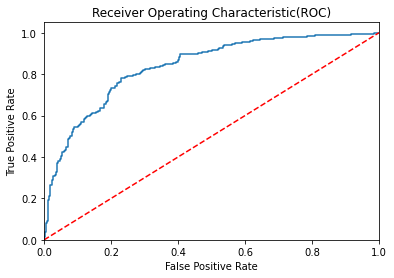

In [218]:
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

Now we will tune our model with GridSearch.

In [219]:
lg_params ={"penalty":["l1", "l2", "elasticnet", "none"],
            "C": list(range(10)),
            "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

You can check all the parameters that can be tuned [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [220]:
logreg = LogisticRegression()
logistic_regression_cv = GridSearchCV(logreg,lg_params,cv=8)

In [221]:
start_time = time.time()

logistic_regression_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for logistic_regression_cv cross validation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time for logistic_regression_cv cross validation: 12.387 seconds


In [222]:
#best score
logistic_regression_cv.best_score_

0.7766666666666667

In [223]:
#best parameters
logistic_regression_cv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [231]:
logreg_tuned = LogisticRegression(C= 1, penalty= "l2", solver= "lbfgs").fit(X_train,y_train)

In [232]:
logreg_tuned

LogisticRegression(C=1)

In [233]:
y_pred = logreg_tuned.predict(X_test)

In [234]:
cm = confusion_matrix(y_test,y_pred)

In [235]:
cm

array([[96, 12],
       [26, 34]])

In [236]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [237]:
recall_score(y_test,y_pred)

0.5666666666666667

In [238]:
precision_score(y_test,y_pred)

0.7391304347826086

In [239]:
f1_score(y_test,y_pred)

0.6415094339622641

## K - Nearest Neighbors(KNN) 

### Theory

The k-nearest neighbors (KNN) algorithm is a non-linear supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics; calculating the distance between points on a graph.

For real-valued input variables, the most popular distance measure is *Euclidean distance*.

Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j. The formula as below:

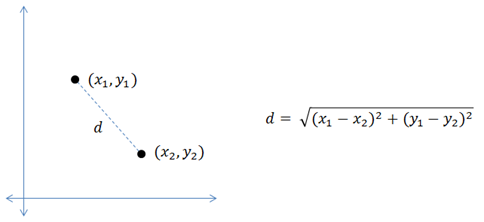

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmccormickml.com%2F2013%2F08%2F15%2Fthe-gaussian-kernel%2F&psig=AOvVaw3oFhYy6YidyaXAGxKY20A5&ust=1626817405823000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPjG0bCN8PECFQAAAAAdAAAAABAD).

Other popular distance measures include:

- Hamming Distance: Calculate the distance between binary vectors.

- Manhattan Distance: Calculate the distance between real vectors using the sum of their absolute difference. Also called City Block Distance.

- Minkowski Distance: Generalization of Euclidean and Manhattan distance.


Predictions are made for a new instance by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the mode (or most common) class value.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [252]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [253]:
df.shape

(768, 9)

In [254]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [255]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [256]:
X.shape

(768, 8)

In [257]:
y.shape

(768,)

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [258]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [259]:
k_nearest_neighbor = KNeighborsClassifier().fit(X_train,y_train)

In [260]:
k_nearest_neighbor

KNeighborsClassifier()

In [261]:
# Default neighbor size
k_nearest_neighbor.n_neighbors

5

In [262]:
# Default distance metric
k_nearest_neighbor.metric

'minkowski'

In [263]:
# Default p
k_nearest_neighbor.p

2

### Prediction

In [264]:
k_nearest_neighbor

KNeighborsClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [265]:
y_pred = k_nearest_neighbor.predict(X_test)

In [266]:
cm = confusion_matrix(y_test,y_pred)

In [267]:
cm

array([[84, 24],
       [27, 33]])

In [268]:
print("Our Accuracy is: ", (84+33)/(84+24+27+33))

Our Accuracy is:  0.6964285714285714


In [269]:
accuracy_score(y_test,y_pred)

0.6964285714285714

In [270]:
recall_score(y_test,y_pred)

0.55

In [271]:
precision_score(y_test,y_pred)

0.5789473684210527

In [272]:
f1_score(y_test,y_pred)

0.5641025641025641

In [273]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.58      0.55      0.56        60

    accuracy                           0.70       168
   macro avg       0.67      0.66      0.67       168
weighted avg       0.69      0.70      0.69       168



### Model Tuning & Validation

In [274]:
k_nearest_neighbor

KNeighborsClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [275]:
accuracies= cross_val_score(estimator=k_nearest_neighbor,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 71.17 %
Standart Deviation of Accuracies: 5.73 %


In [277]:
k_nearest_neighbor.predict(X_test)[:10]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

As you can see *predict()* function gives us directly classes. If we want to get probabilites of each classes, we can use **predict_proba()** function. We can also give manual treshold to classify.

In [278]:
results =pd.DataFrame(k_nearest_neighbor.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

In [280]:
results.head()

,Possibility of 0,Possibility of 1,Class
0,0.6,0.4,0
1,0.8,0.2,0
2,0.2,0.8,1
3,0.6,0.4,0
4,0.0,1.0,1


Now we will tune our model with GridSearch.

In [281]:
knn_params ={"n_neighbors":np.arange(1,70)}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [282]:
knn = KNeighborsClassifier()
k_nearest_neighbor_cv = GridSearchCV(knn,knn_params,cv=8)

In [283]:
start_time = time.time()

k_nearest_neighbor_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for k_nearest_neighbor_cv cross validation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time for k_nearest_neighbor_cv cross validation: 3.124 seconds


In [284]:
#best score
k_nearest_neighbor_cv.best_score_

0.74

In [285]:
#best parameters
k_nearest_neighbor_cv.best_params_

{'n_neighbors': 10}

In [286]:
knn_tuned = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

In [287]:
knn_tuned

KNeighborsClassifier(n_neighbors=10)

In [288]:
y_pred = knn_tuned.predict(X_test)

In [289]:
cm = confusion_matrix(y_test,y_pred)

In [290]:
cm

array([[94, 14],
       [32, 28]])

In [293]:
print("Our Accuracy is: ", (94+28)/(94+28+32+14))

Our Accuracy is:  0.7261904761904762


In [294]:
accuracy_score(y_test,y_pred)

0.7261904761904762

In [295]:
recall_score(y_test,y_pred)

0.4666666666666667

In [296]:
precision_score(y_test,y_pred)

0.6666666666666666

In [297]:
f1_score(y_test,y_pred)

0.5490196078431373

In [298]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       108
           1       0.67      0.47      0.55        60

    accuracy                           0.73       168
   macro avg       0.71      0.67      0.68       168
weighted avg       0.72      0.73      0.71       168



## Support Vector Machines - Classifier(SVC) - Linear Kernel

### Theory

Support Vector Machine gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. The objective function of SVM is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, **ϵ (epsilon)**. We can tune epsilon to gain the desired accuracy of our model.

**Support Vectors**: Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**: A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**: A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Illustrative example:

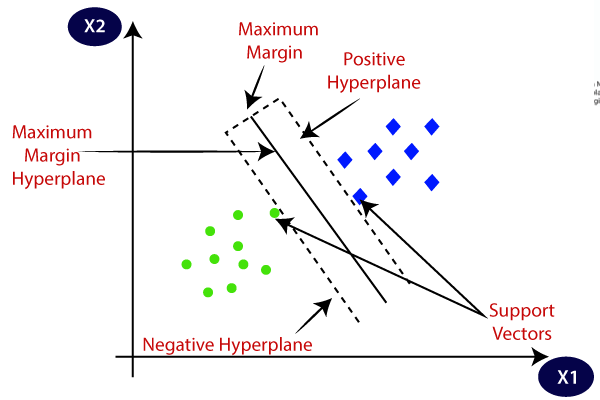

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.javatpoint.com%2Fmachine-learning-support-vector-machine-algorithm&psig=AOvVaw3FxpNzGG1chVLRHsK1NLlo&ust=1642434057687000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCLC1sOnNtvUCFQAAAAAdAAAAABAD).

As we can see, we have data points that are outside the epsilon in sensitive tube. We care about the error for them and they will be measured as distance between the point and the tube. As such, we need to account for the possibility of errors that are larger than ϵ. We can do this with slack variables.

The concept of **slack variables** is simple: for any value that falls outside of ϵ, we can denote its deviation from the margin as ξ.

That's the formula to minimise:

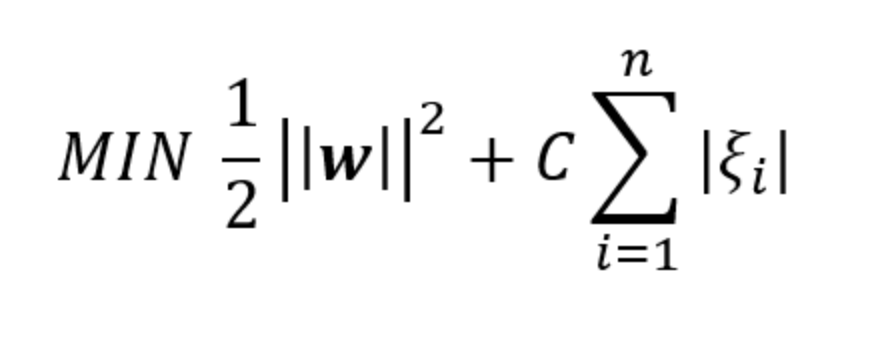

Photo is cited by [here](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2)

We now have an additional **C** hyperparameter that we can tune. As C increases, our tolerance for points outside of ϵ also increases. As C approaches 0, the tolerance approaches 0 and the equation collapses into the simplified one.

SVM uses Maximum Margin Classifiers to find maximum margin. But Maximum Margin Classifiers are super sensitive to outliers in the training data. To make a treshold that less sensitive to outliers, we allow misclassification. This makes higher bias and low variance. When we allow misclassification to the distance between supporter observation and threshold, it is called **Soft Margin**. In order to understand best soft margin, we use cross validation.

Some problems can’t be solved using linear hyperplane. In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space.

**SVM Kernels**

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. Kernel Functions only calculate the relationships between every pair of points as if they are in the higher dimensions, the do not actually do the transformation.  This is called Kernel Trick. In other words, we can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps us to build a more accurate classifier.

**Some Kernels**

- **Linear Kernel**: A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

        K(x, xi) = sum(x * xi)

- **Polynomial Kernel**: A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

        K(x,xi) = 1 + sum(x * xi)^d (Where d is the degree of the polynomial)

- **Radial Basis(Gaussion) Function Kernel**: The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in **infinite dimensional space**.

        K(x,xi) = exp(-gamma * sum((x – xi^2))
        
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

I highly suggest you to read [this article](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) for this part.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [307]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [308]:
df.shape

(768, 9)

In [309]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [310]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [311]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [312]:
support_vector_classifier = SVC(kernel="linear").fit(X_train,y_train)

We also could use *svm.LinearSVC()* function directly.

In [313]:
support_vector_classifier

SVC(kernel='linear')

In [314]:
# Default C
support_vector_classifier.C

1.0

### Prediction

In [321]:
support_vector_classifier

SVC(kernel='linear')

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [322]:
y_pred = support_vector_classifier.predict(X_test)

In [323]:
cm = confusion_matrix(y_test,y_pred)

In [324]:
cm

array([[96, 12],
       [27, 33]])

In [325]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7678571428571429


In [326]:
accuracy_score(y_test,y_pred)

0.7678571428571429

In [328]:
recall_score(y_test,y_pred)

0.55

In [329]:
precision_score(y_test,y_pred)

0.7333333333333333

In [330]:
f1_score(y_test,y_pred)

0.6285714285714286

In [333]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       108
           1       0.73      0.55      0.63        60

    accuracy                           0.77       168
   macro avg       0.76      0.72      0.73       168
weighted avg       0.76      0.77      0.76       168



### Model Tuning & Validation

In [334]:
support_vector_classifier

SVC(kernel='linear')

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [335]:
accuracies= cross_val_score(estimator=support_vector_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 77.33 %
Standart Deviation of Accuracies: 4.90 %


In [336]:
support_vector_classifier.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

Now we will tune our model with GridSearch.

In [341]:
svm_params ={"C":np.arange(1,5)}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [343]:
svm = SVC(kernel="linear")
svm_cv = GridSearchCV(svm,svm_params,cv=5,n_jobs =-1)

In [344]:
start_time = time.time()

svm_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Support Vector Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time for Support Vector Classifier cross validation: 33.955 seconds


In [345]:
#best score
svm_cv.best_score_

0.7733333333333332

In [346]:
#best parameters
svm_cv.best_params_

{'C': 3}

In [347]:
svm_tuned = SVC(kernel="linear",C=2).fit(X_train,y_train)

In [348]:
svm_tuned

SVC(C=2, kernel='linear')

In [349]:
y_pred = svm_tuned.predict(X_test)

In [350]:
cm = confusion_matrix(y_test,y_pred)

In [351]:
cm

array([[96, 12],
       [27, 33]])

In [352]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7678571428571429


In [353]:
accuracy_score(y_test,y_pred)

0.7678571428571429

In [354]:
recall_score(y_test,y_pred)

0.55

In [355]:
precision_score(y_test,y_pred)

0.7333333333333333

In [356]:
f1_score(y_test,y_pred)

0.6285714285714286

In [357]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       108
           1       0.73      0.55      0.63        60

    accuracy                           0.77       168
   macro avg       0.76      0.72      0.73       168
weighted avg       0.76      0.77      0.76       168



## Support Vector Machines - Classifier(SVC) - Radial Basis Kernel(RBF)

### Theory

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. Kernel Functions only calculate the relationships between every pair of points as if they are in the higher dimensions, the do not actually do the transformation.  This is called **Kernel Trick**. In other words, we can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps us to build a more accurate classifier.

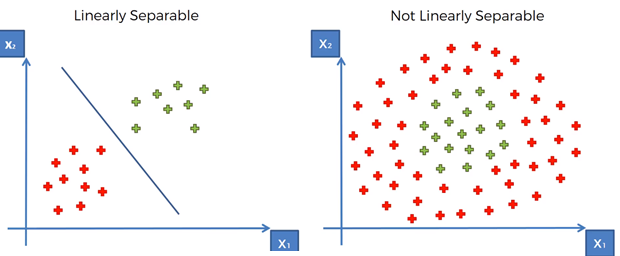

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fpursuitnotes%2Fday-12-kernel-svm-non-linear-svm-5fdefe77836c&psig=AOvVaw04okfh2OVimfvUsX8lEKRm&ust=1628623796797000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCNDUns3WpPICFQAAAAAdAAAAABAD).

But mapping to a higher dimensional space can be highly compute-intensive. Therefore this approach is not the best. We use **kernel trick** because of that. 

**Radial Basis(Gaussion) Function Kernel**: The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in **infinite dimensional space**.

        K(x,xi) = exp(-gamma * sum((x – xi^2))
        
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm. It is specified with cross validation.

When there is a new observation to classify, radial kernel behaves like a *Weighted Nearest Neighbour*. Because the closest observation(nearest neihgbour) have a lot of influence on how we classify the new observation. 

I highly suggest you to read [this article](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) for this part.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [358]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [359]:
df.shape

(768, 9)

In [360]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [361]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [362]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


We will use **rbf kernel** here.

In [363]:
support_vector_classifier = SVC(kernel="rbf").fit(X_train,y_train)

In [364]:
#get support vectors
support_vector_classifier.support_vectors_

array([[5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 0.00e+00, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       [4.00e+00, 1.10e+02, 9.20e+01, ..., 3.76e+01, 1.91e-01, 3.00e+01],
       ...,
       [1.10e+01, 1.11e+02, 8.40e+01, ..., 4.68e+01, 9.25e-01, 4.50e+01],
       [3.00e+00, 1.32e+02, 8.00e+01, ..., 3.44e+01, 4.02e-01, 4.40e+01],
       [1.00e+00, 1.73e+02, 7.40e+01, ..., 3.68e+01, 8.80e-02, 3.80e+01]])

In [365]:
#get supports
support_vector_classifier.support_

array([  5,   7,  10,  12,  18,  20,  28,  29,  30,  34,  35,  36,  40,
        41,  44,  46,  54,  57,  58,  59,  63,  67,  69,  71,  73,  75,
        80,  85,  86,  91,  94,  95, 101, 102, 105, 107, 121, 123, 126,
       127, 135, 138, 139, 140, 141, 144, 148, 150, 153, 160, 161, 162,
       166, 167, 168, 172, 178, 184, 191, 200, 201, 204, 211, 212, 217,
       222, 223, 228, 229, 233, 244, 246, 247, 248, 249, 250, 251, 256,
       257, 258, 260, 263, 267, 272, 274, 281, 282, 285, 286, 294, 295,
       297, 304, 305, 307, 311, 318, 320, 324, 325, 327, 335, 336, 340,
       342, 343, 345, 346, 347, 350, 351, 354, 361, 362, 364, 374, 384,
       390, 392, 395, 401, 405, 410, 411, 412, 413, 420, 423, 428, 430,
       433, 436, 437, 439, 442, 452, 453, 456, 459, 464, 469, 470, 471,
       472, 473, 474, 475, 478, 479, 481, 486, 487, 489, 495, 499, 507,
       509, 511, 517, 519, 521, 522, 524, 528, 531, 533, 538, 547, 548,
       549, 550, 555, 558, 568, 571, 574, 575, 578, 582, 583, 59

In [366]:
# get number of support vectors for each class
support_vector_classifier.n_support_

array([182, 184], dtype=int32)

In [367]:
#default gamma
support_vector_classifier.gamma

'scale'

### Prediction

In [368]:
support_vector_classifier

SVC()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [369]:
y_pred = support_vector_classifier.predict(X_test)

In [370]:
cm = confusion_matrix(y_test,y_pred)

In [371]:
cm

array([[97, 11],
       [30, 30]])

In [372]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7559523809523809


In [373]:
accuracy_score(y_test,y_pred)

0.7559523809523809

In [374]:
recall_score(y_test,y_pred)

0.5

In [375]:
precision_score(y_test,y_pred)

0.7317073170731707

In [376]:
f1_score(y_test,y_pred)

0.594059405940594

In [377]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       108
           1       0.73      0.50      0.59        60

    accuracy                           0.76       168
   macro avg       0.75      0.70      0.71       168
weighted avg       0.75      0.76      0.74       168



### Model Tuning & Validation

In [378]:
support_vector_classifier

SVC()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [379]:
accuracies= cross_val_score(estimator=support_vector_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 75.00 %
Standart Deviation of Accuracies: 4.22 %


In [380]:
support_vector_classifier.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

Now we will tune our model with GridSearch. We will tune *gamma* and *C* parameters.

In [382]:
svc_params ={"C":[0.0001,0.001,0.01,0.1,0.5,1,3,5,7,10,40,80,100],
             "gamma":[0.0001,0.001,0.01,0.1,0.5,1,5,10,30,50,100]}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [383]:
svc = SVC(kernel="rbf")
svc_cv = GridSearchCV(svc,svc_params,cv=5,n_jobs=-1,verbose=2)

In [384]:
start_time = time.time()

svc_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Support Vector Classifier with RBF kernel cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 5 folds for each of 143 candidates, totalling 715 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.4s


Elapsed time for Support Vector Classifier with RBF kernel cross validation: 5.404 seconds


[Parallel(n_jobs=-1)]: Done 715 out of 715 | elapsed:    5.4s finished


In [385]:
#best score
svc_cv.best_score_

0.7533333333333333

In [386]:
#best parameters
svc_cv.best_params_

{'C': 3, 'gamma': 0.0001}

In [387]:
svc_tuned = SVC(kernel="rbf",C=3,gamma=0.0001).fit(X_train,y_train)

In [388]:
svc_tuned

SVC(C=3, gamma=0.0001)

In [389]:
y_pred = svc_tuned.predict(X_test)

In [390]:
cm = confusion_matrix(y_test,y_pred)

In [391]:
cm

array([[99,  9],
       [29, 31]])

In [392]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7738095238095238


In [393]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [394]:
recall_score(y_test,y_pred)

0.5166666666666667

In [395]:
precision_score(y_test,y_pred)

0.775

In [396]:
f1_score(y_test,y_pred)

0.62

In [397]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       108
           1       0.78      0.52      0.62        60

    accuracy                           0.77       168
   macro avg       0.77      0.72      0.73       168
weighted avg       0.77      0.77      0.76       168



## Decision Tree Classification

### Theory

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The representation for the CART model is a binary tree. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

**Lockdown Example**

For example, I tried to generate a guide for citizens in the big cities about
going-out permissions during Covid-19 Pandemic. For the sake of simplicity, the users are adult
citizens who are older than 20 years.

The guide first checks the age of the citizen. If the citizen is 65+, then it checks if it is an Out-Day-
For65+. A 65+ user is allowed to go out only if it is an Out-Day-For-65+, otherwise he/she is
not allowed to go out.

If the age of the citizen is not 65+, then the guide checks if that day is a Lockdown-Day. If it is not a
lockdown day, this younger citizen is allowed to go out. However, if it is a lockdown day, the
younger citizens can go out only if he/she accompanies a 65+ person. Otherwise he is not allowed to go out.

In this example, *Age of Citizen* is **root node** at the beginning of a tree. It represents entire population being analyzed. From the root node, the population is divided according to age.

*Allowed to go out* and *Not allowed to go out* is **Leaf(Terminal) Node** that does not split anything.Splitting is a process of dividing a node into two or more sub-nodes.

**Parent and Child Node** is a node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

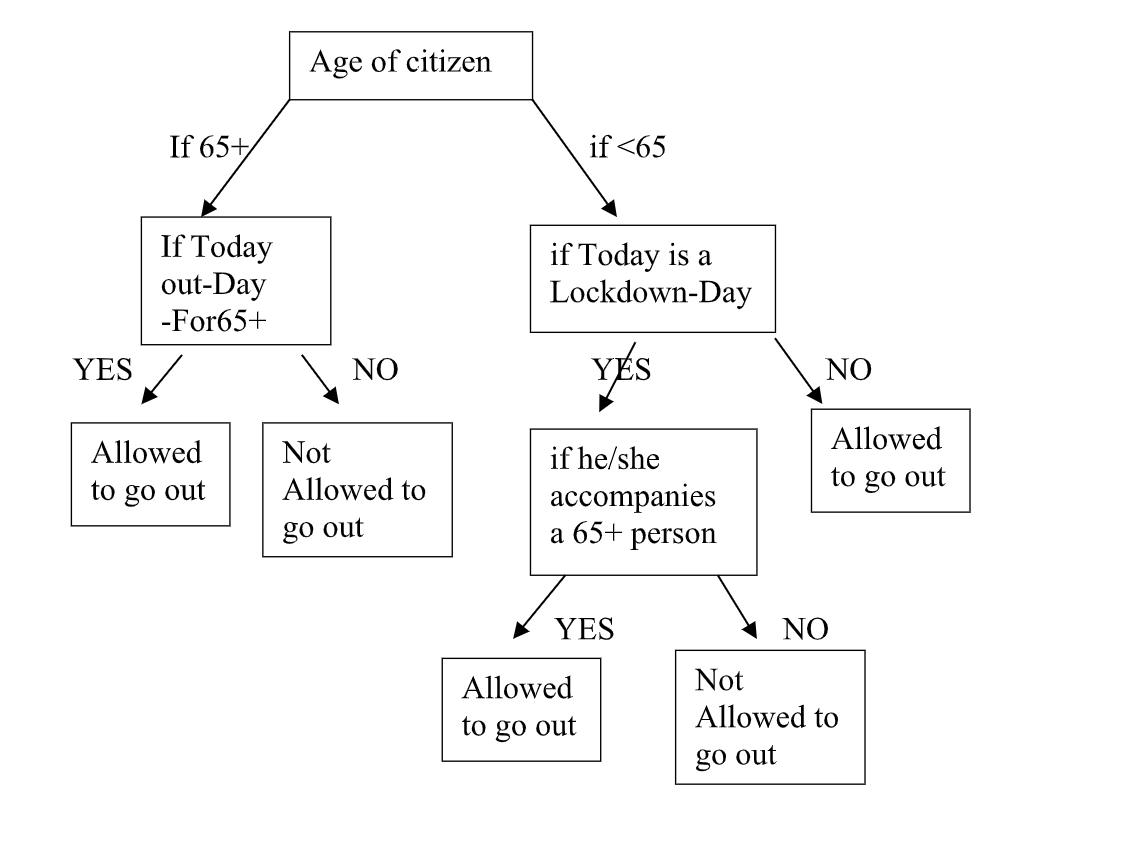

The Classification Tree (CART) algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [400]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [401]:
df.shape

(768, 9)

In [402]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [403]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [404]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [405]:
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)

In [406]:
decision_tree

DecisionTreeClassifier()

In [412]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [411]:
decision_tree.get_n_leaves()

110

In [410]:
decision_tree.get_depth()

14

Let's see the structure of the tree. It can be seen huge because of feature number.

In [430]:
print(skompile(decision_tree.predict).to("python/code"))

(((((0 if x[6] <= 0.671999990940094 else 0 if x[0] <= 2.5 else 1) if x[5] <=
    30.899999618530273 else (1 if x[5] <= 31.100000381469727 else (((0 if x
    [3] <= 40.5 else 1) if x[4] <= 34.0 else 1) if x[1] <= 111.5 else 1 if 
    x[5] <= 34.64999961853027 else 0) if x[4] <= 36.5 else (0 if x[6] <= 
    0.5094999969005585 else 1 if x[6] <= 0.5149999856948853 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[6] <= 0.6895000040531158 else (
    1 if x[1] <= 109.5 else 1 if x[3] <= 8.0 else 0) if x[6] <= 
    0.9174999892711639 else 0) if x[5] <= 45.39999961853027 else 1) if x[7] <=
    28.5 else (0 if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else
    (((1 if x[7] <= 32.0 else 0) if x[6] <= 0.17750000208616257 else 0) if 
    x[0] <= 9.5 else 0 if x[3] <= 15.5 else 1 if x[4] <= 27.0 else 0) if x[
    6] <= 1.1225000023841858 else 1) if x[1] <= 99.5 else (((((((0 if x[0] <=
    3.5 else 1) if x[2] <= 63.0 else 0) if x[0] <= 6.5 else 1 if x[0] <= 
    8.5 else 0) if

We can also plot it with *plot_tree()* function of sklearn.

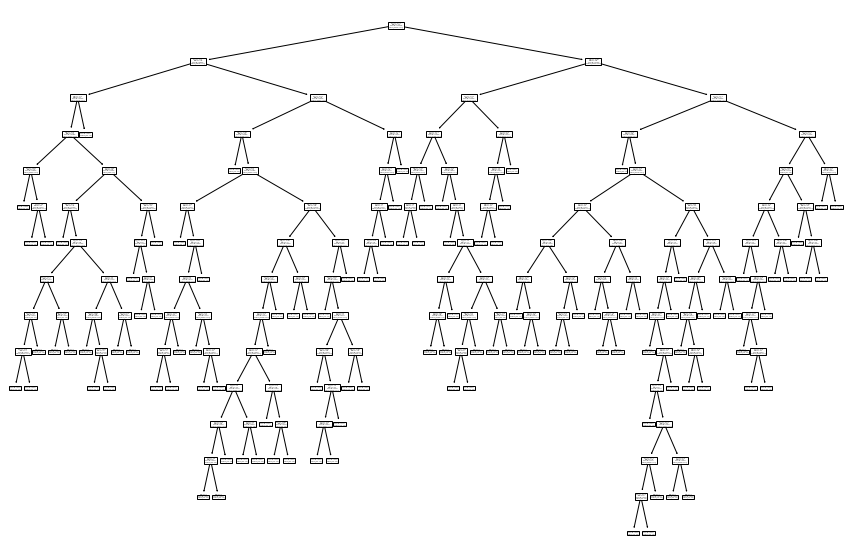

In [435]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree,proportion=True);

### Prediction

In [413]:
decision_tree

DecisionTreeClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [414]:
y_pred = decision_tree.predict(X_test)

In [415]:
cm = confusion_matrix(y_test,y_pred)

In [416]:
cm

array([[80, 28],
       [24, 36]])

In [417]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.6904761904761905


In [418]:
accuracy_score(y_test,y_pred)

0.6904761904761905

In [419]:
recall_score(y_test,y_pred)

0.6

In [420]:
precision_score(y_test,y_pred)

0.5625

In [421]:
f1_score(y_test,y_pred)

0.5806451612903225

In [422]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       108
           1       0.56      0.60      0.58        60

    accuracy                           0.69       168
   macro avg       0.67      0.67      0.67       168
weighted avg       0.70      0.69      0.69       168



### Model Tuning

In [423]:
decision_tree

DecisionTreeClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [424]:
accuracies= cross_val_score(estimator=decision_tree,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 67.83 %
Standart Deviation of Accuracies: 6.19 %


In [425]:
decision_tree.predict(X_test)[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *criterion*, *max_depth* and *min_samples_split* parameters.

In [437]:
decision_tree_params ={"criterion":["gini","entropy"],
                       "max_depth":[1,2,3,4,5,6,7,8,9,10],
                       "min_samples_split":list(range(1,10))}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [438]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(decision_tree_classifier,decision_tree_params,cv=9,n_jobs=-1,verbose=2)

In [439]:
start_time = time.time()

decision_tree_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Decision Tree Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 180 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.9s


Elapsed time for Decision Tree Classifier cross validation: 6.978 seconds


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    7.0s finished


In [440]:
#best score
decision_tree_cv.best_score_

0.7534046937032012

In [441]:
#best parameters
decision_tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [442]:
decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_split=2).fit(X_train,y_train)

In [443]:
decision_tree_tuned

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [444]:
y_pred = decision_tree_tuned.predict(X_test)

In [445]:
cm = confusion_matrix(y_test,y_pred)

In [446]:
cm

array([[90, 18],
       [26, 34]])

In [447]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7380952380952381


In [448]:
accuracy_score(y_test,y_pred)

0.7380952380952381

In [449]:
recall_score(y_test,y_pred)

0.5666666666666667

In [450]:
precision_score(y_test,y_pred)

0.6538461538461539

In [451]:
f1_score(y_test,y_pred)

0.6071428571428571

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       108
           1       0.65      0.57      0.61        60

    accuracy                           0.74       168
   macro avg       0.71      0.70      0.71       168
weighted avg       0.73      0.74      0.73       168



## Ensemble Learning - Random Forests Classification

### Theory

Random Forest is also an example of ensemble learning, in which we combine multiple machine learning algorithms to obtain better predictive performance.

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Let's try to understand with an example. For example, I want to watch a movie today and I am not sure what to watch. After calling one of my best friends, she recommend a movie to me according to my old preferences that she know. At this point, my old preferences are training set for her. It's a classical decision tree. But if I would get recommendations from my 20 different friends and select most voted movie, that would be **Random Forests**.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

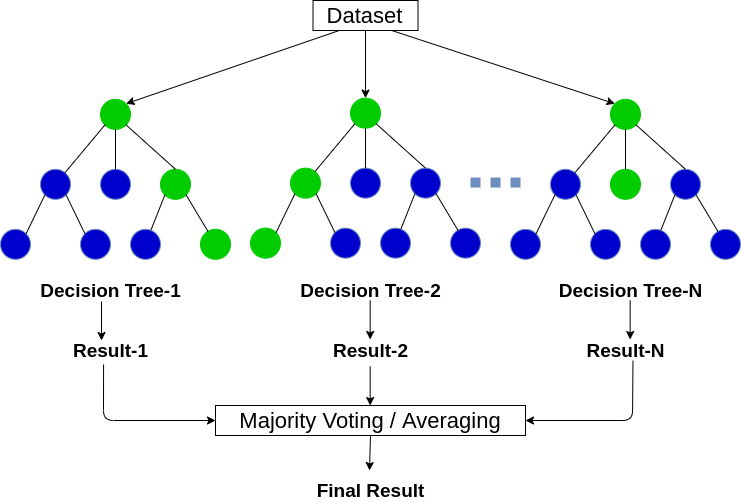

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2020%2F05%2Fdecision-tree-vs-random-forest-algorithm%2F&psig=AOvVaw2jevf2JFgvEKCBieh5yaHX&ust=1627289101408000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCICY4bvq_fECFQAAAAAdAAAAABAD)

Yet another great quality of Random Forests is that they make it easy to measure the relative *importance of each feature*. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it. 

Another advantage of sampling over the features is that it makes the decision making process more robust to missing data: observations (from the training dataset or not) with missing data can still be regressed or classified based on the trees that take into account only features where data are not missing. Thus, random forest algorithm combines the concepts of bagging and random feature subspace selection to create more robust models.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [453]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [454]:
df.shape

(768, 9)

In [455]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [456]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [457]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [458]:
random_forest = RandomForestClassifier().fit(X_train,y_train)

In [459]:
random_forest

RandomForestClassifier()

In [460]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

As we say in the theory section, we can see importances of features in Random Forests.

In [473]:
feature_importances =pd.DataFrame({"Features":X_train.columns,
              "Feature Imporances": random_forest.feature_importances_}).sort_values(by="Feature Imporances")

In [474]:
feature_importances.head()

,Features,Feature Imporances
3,SkinThickness,0.067154
0,Pregnancies,0.080799
4,Insulin,0.084634
2,BloodPressure,0.088854
6,DiabetesPedigreeFunction,0.123966


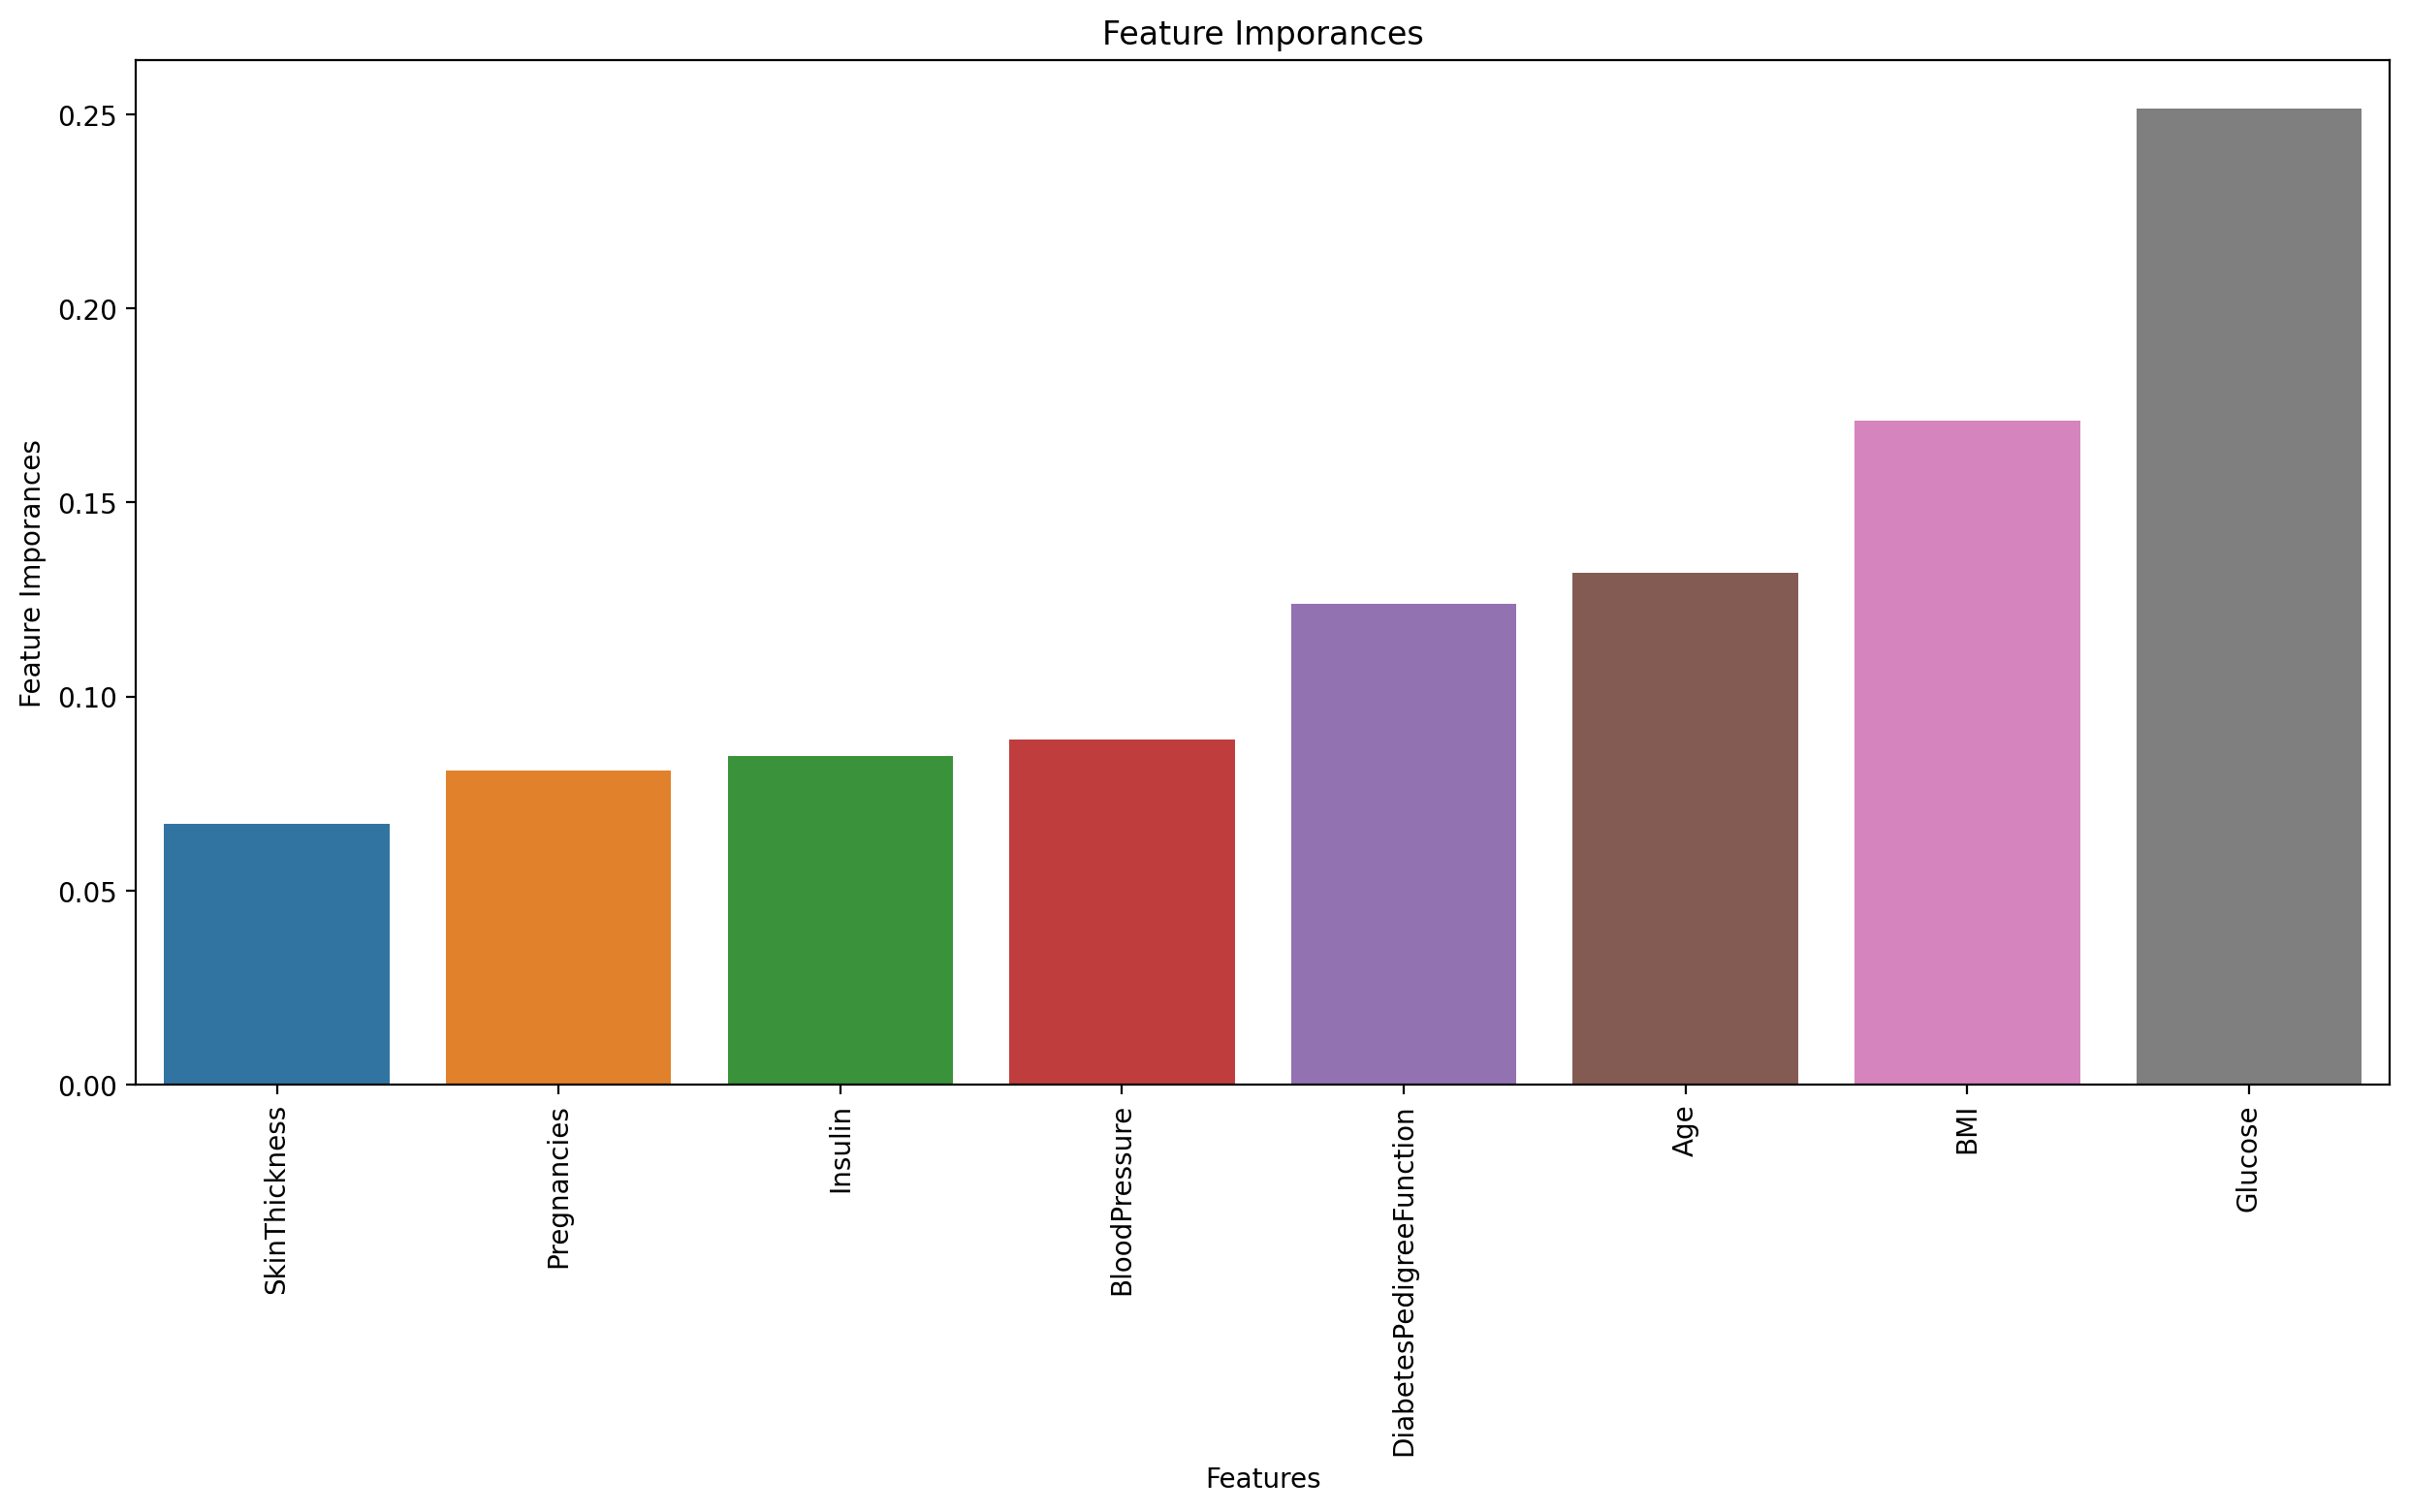

In [476]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=feature_importances,x="Features",y="Feature Imporances")
plt.title("Feature Imporances")
plt.xticks(rotation=90)
plt.show()

Total of ratios should be equal to 1.

In [478]:
feature_importances["Feature Imporances"].cumsum()

3    0.067154
0    0.147953
4    0.232587
2    0.321442
6    0.445408
7    0.577309
5    0.748512
1    1.000000
Name: Feature Imporances, dtype: float64

### Prediction

In [480]:
random_forest

RandomForestClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [482]:
y_pred = random_forest.predict(X_test)

In [483]:
cm = confusion_matrix(y_test,y_pred)

In [484]:
cm

array([[98, 10],
       [24, 36]])

In [485]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7976190476190477


In [486]:
accuracy_score(y_test,y_pred)

0.7976190476190477

In [487]:
recall_score(y_test,y_pred)

0.6

In [488]:
precision_score(y_test,y_pred)

0.782608695652174

In [489]:
f1_score(y_test,y_pred)

0.6792452830188679

In [490]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       108
           1       0.78      0.60      0.68        60

    accuracy                           0.80       168
   macro avg       0.79      0.75      0.77       168
weighted avg       0.80      0.80      0.79       168



### Model Tuning

In [492]:
random_forest

RandomForestClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [493]:
accuracies= cross_val_score(estimator=random_forest,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 76.00 %
Standart Deviation of Accuracies: 6.24 %


In [494]:
random_forest.predict(X_test)[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *criterion*,max_features,*n_estimators* and *max_depth* parameters.

In [498]:
random_forests_params = {"max_depth": list(range(1,10)),
                         "max_features":[2,5,7, 8],
                         "n_estimators":[300,500,1000,1700,2000],
                         "criterion":["gini","entropy"]}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [499]:
random_forest_classifier = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest_classifier,random_forests_params,cv=9,n_jobs=-1,verbose=2)

In [500]:
start_time = time.time()

random_forest_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Random Forests Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 360 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 29.9min finished


Elapsed time for Random Forests Classifier cross validation: 1793.859 seconds


In [501]:
#best score
random_forest_cv.best_score_

0.7701140760842253

In [502]:
#best parameters
random_forest_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'n_estimators': 500}

In [504]:
random_forest_tuned = RandomForestClassifier(criterion="gini",max_depth=5,max_features=2,
                                             n_estimators=500).fit(X_train,y_train)

In [505]:
random_forest_tuned

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=500)

In [506]:
y_pred = random_forest_tuned.predict(X_test)

In [507]:
cm = confusion_matrix(y_test,y_pred)

In [508]:
cm

array([[98, 10],
       [26, 34]])

In [509]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7857142857142857


In [510]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [511]:
recall_score(y_test,y_pred)

0.5666666666666667

In [512]:
precision_score(y_test,y_pred)

0.7727272727272727

In [513]:
f1_score(y_test,y_pred)

0.6538461538461539

In [514]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       108
           1       0.77      0.57      0.65        60

    accuracy                           0.79       168
   macro avg       0.78      0.74      0.75       168
weighted avg       0.78      0.79      0.78       168



Let's look at the importances of features.

In [515]:
Importances = pd.DataFrame({"Importance":random_forest_tuned.feature_importances_*100},index=X_train.columns)

In [516]:
Importances.head()

,Importance
Pregnancies,6.324532
Glucose,33.418251
BloodPressure,5.098596
SkinThickness,4.923197
Insulin,8.376611


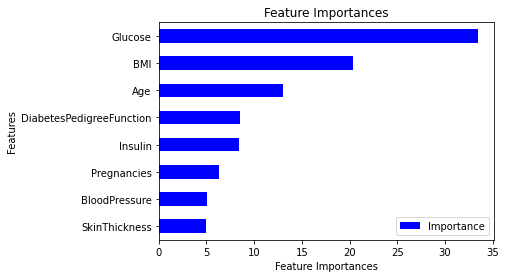

In [517]:
Importances.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances");

## Naive Bayes Classification

### Theory

Before we dive into to the Naive Bayes algorithm, we need to understand basis of it: **Bayes Therom**.

In machine learning we are often interested in selecting the best hypothesis (h) given data (d).

In a classification problem, our hypothesis (h) may be the class to assign for a new data instance (d).

One of the easiest ways of selecting the most probable hypothesis given the data that we have that we can use as our prior knowledge about the problem. Bayes Theorem provides a way that we can calculate the probability of a hypothesis given our prior knowledge.

Bayes’ Theorem is stated as:

                                P(h|d) = (P(d|h) * P(h)) / P(d)

Where

- P(h|d) is the probability of hypothesis h given the data d. This is called the **posterior probability**.

- P(d|h) is the probability of data d given that the hypothesis h was true.

- P(h) is the probability of hypothesis h being true (regardless of the data). This is called the **prior probability of h**.

- P(d) is the probability of the data (regardless of the hypothesis).


 - Note: **P** is considered as probability.

 We can see that we are interested in calculating the posterior probability of P(h|d) from the prior probability p(h) with P(d) and P(d|h).

After calculating the posterior probability for a number of different hypotheses, we can select the hypothesis with the highest probability. This is the maximum probable hypothesis and may formally be called the *maximum a posteriori (MAP)* hypothesis.

Let's do an example.

Imagine that we have 2 machine M1 and M2. Machine 1 produces 30 wrenches in an hour while machine 2 produces 20 wrenches. Out of all produced parts, the probability of being defective is 1%. But out of all defective parts, 50% comes from M1 and othen 50% comes from M2. So the question is: **What is the probability that a part produced by M2 is defective?**

First, let's convert all details to mathematical terms.

- P(M1) : 30 / 50 = 0.6

- P(M2) : 20 / 50 = 0.4

- P(defective) : 1 %

- P(M1 | defective) : 50 %

- P(M2 | defective) : 50 %

What we want is : **P(defective | M2)**

So the formula of bayes therom is :

                        P(defective | M2) = (P(M2 | defective) * P(defective)) / P(M2) 
                        
When we calculate it:

(0.5 * 0.01) / 0.1 = 0.0125 = 12.5 % 

***

 Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called *naive Bayes or idiot Bayes* because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

 A list of probabilities are stored to file for a learned naive Bayes model. This includes:

- **Class Probabilities**: The class probabilities are simply the frequency of instances that belong to each class divided by the total number of instances.

- **Conditional Probabilities**: The conditional probabilities are the frequency of each attribute value for a given class value divided by the frequency of instances with that class value.

There are different types of Naive Bayes Classifier:

- Multinomial Naive Bayes:

This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

- Bernoulli Naive Bayes:

This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

- Gaussian Naive Bayes:

When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [518]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [519]:
df.shape

(768, 9)

In [520]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [521]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [522]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [523]:
nb = GaussianNB().fit(X_train,y_train)

In [524]:
nb

GaussianNB()

### Prediction

In [525]:
nb.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [526]:
y_pred = nb.predict(X_test)

In [527]:
cm = confusion_matrix(y_test,y_pred)

In [528]:
cm

array([[92, 16],
       [24, 36]])

In [529]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7619047619047619


In [530]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [531]:
recall_score(y_test,y_pred)

0.6

In [532]:
precision_score(y_test,y_pred)

0.6923076923076923

In [533]:
f1_score(y_test,y_pred)

0.6428571428571429

In [534]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       108
           1       0.69      0.60      0.64        60

    accuracy                           0.76       168
   macro avg       0.74      0.73      0.73       168
weighted avg       0.76      0.76      0.76       168



Naive Bayes has no hyperparameter, so that's why we won't do model tuning here.

## XGBoost (Extreme Gradient Boosting) Classification

### Theory

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

**Advantages**

**Regularization**: XGBoost has an option to penalize complex models through both L1 and L2 regularization. Regularization helps in preventing overfitting

**Handling sparse data**: Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data

**Weighted quantile sketch**: Most existing tree based algorithms can find the split points when the data points are of equal weights (using quantile sketch algorithm). However, they are not equipped to handle weighted data. XGBoost has a distributed weighted quantile sketch algorithm to effectively handle weighted data

**Block structure for parallel learning**: For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling

**Cache awareness**: In XGBoost, non-continuous memory access is required to get the gradient statistics by row index. Hence, XGBoost has been designed to make optimal use of hardware. This is done by allocating internal buffers in each thread, where the gradient statistics can be stored

**Out-of-core computing**: This feature optimizes the available disk space and maximizes its usage when handling huge datasets that do not fit into memory

**Parallelization**: XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads.

The most commonly configured hyperparameters are the following:

- **n_estimators**: The number of trees in the ensemble, often increased until no further improvements are seen.

- **max_depth**: The maximum depth of each tree, often values are between 1 and 10.

- **eta**: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

- **subsample**: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

- **colsample_bytree**: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

We will try to predict whether the patient has diabetes or not.

In [535]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [536]:
df.shape

(768, 9)

In [537]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [538]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [539]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [541]:
xgb_classifier = XGBClassifier().fit(X_train,y_train)

[23:11:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [542]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [543]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [544]:
xgb_classifier.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [545]:
y_pred = xgb_classifier.predict(X_test)

In [546]:
cm = confusion_matrix(y_test,y_pred)

In [547]:
cm

array([[88, 20],
       [24, 36]])

In [548]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7380952380952381


In [549]:
accuracy_score(y_test,y_pred)

0.7380952380952381

In [550]:
recall_score(y_test,y_pred)

0.6

In [551]:
precision_score(y_test,y_pred)

0.6428571428571429

In [552]:
f1_score(y_test,y_pred)

0.6206896551724138

In [553]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       108
           1       0.64      0.60      0.62        60

    accuracy                           0.74       168
   macro avg       0.71      0.71      0.71       168
weighted avg       0.73      0.74      0.74       168



### Model Tuning

In [556]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [557]:
accuracies= cross_val_score(estimator=xgb_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [558]:
xgb_classifier.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *learning_rate*, *max_depth*, *n_estimators* and *subsample* parameters.

In [560]:
xgboost_params ={"learning_rate":[0.1,0.01,0.02,0.05],
                 "subsample":[0.6,0.8,1.0],
                 "max_depth":[1,2,3,4,5,6],
                 "n_estimators":[100,500,1000,2000]}

All hyperparameters can be found [here](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning).

In [561]:
xgboost_classifier = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost_classifier,xgboost_params,cv=9,n_jobs=-1,verbose=2)

In [562]:
start_time = time.time()

xgboost_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for XGBoost Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 288 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 55.9min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 57.2min finished


[00:21:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time for Decision Tree Classifier cross validation: 3430.689 seconds


In [563]:
#best score
xgboost_cv.best_score_

0.7634303231318157

In [564]:
#best parameters
xgboost_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}

In [566]:
xgboost_tuned = XGBClassifier(learning_rate=0.05,max_depth=2,
                              subsample=0.8,n_estimators=100).fit(X_train,y_train)

[00:22:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [567]:
xgboost_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [568]:
y_pred = xgboost_tuned.predict(X_test)

In [569]:
cm = confusion_matrix(y_test,y_pred)

In [570]:
cm

array([[94, 14],
       [24, 36]])

In [571]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7738095238095238


In [572]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [573]:
recall_score(y_test,y_pred)

0.6

In [574]:
precision_score(y_test,y_pred)

0.72

In [575]:
f1_score(y_test,y_pred)

0.6545454545454547

In [576]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       108
           1       0.72      0.60      0.65        60

    accuracy                           0.77       168
   macro avg       0.76      0.74      0.74       168
weighted avg       0.77      0.77      0.77       168



## Summary - Model Comparison



| Model | Accuracy | Recall | Precision | F-1 Score 
| --- | --- | --- | --- | --- |
| Logistic Regression Classification | 0.77 | 0.56 | 0.73 | 0.64 |
| K - Nearest Neighbors(KNN) | 0.72 | 0.46 | 0.66 | 0.54 |
| Support Vector Classification(SVC) with Linear Kernel | 0.76 | 0.55 | 0.73 | 0.62 |
| Support Vector Classification with Radial Basis Kernel | 0.77 | 0.51 | 0.77 | 0.62 |
| Decision Tree Classification | 0.73 | 0.56 | 0.65 | 0.60 |
| Random Forests Classification | 0.78 | 0.56 | 0.77 | 0.65 |
| Naive Bayes Classification | 0.76 | 0.6 | 0.69 | 0.64|
| XGBoost Classification | 0.77 | 0.6 | 0.72 | 0.65 |